#**Fundamentos de ciencia de datos 2022-01**

###Profesor: Alejandro García M
###Semana 3 Clase 2¶

###**Tipos de Datos y Binning (agrupación)**

Cuando trabajamos en proyectos de ciencia de datos, es importante reconocer los diferentes tipos de datos: numéricos (discretos y contínuos), categóricos y ordinales.

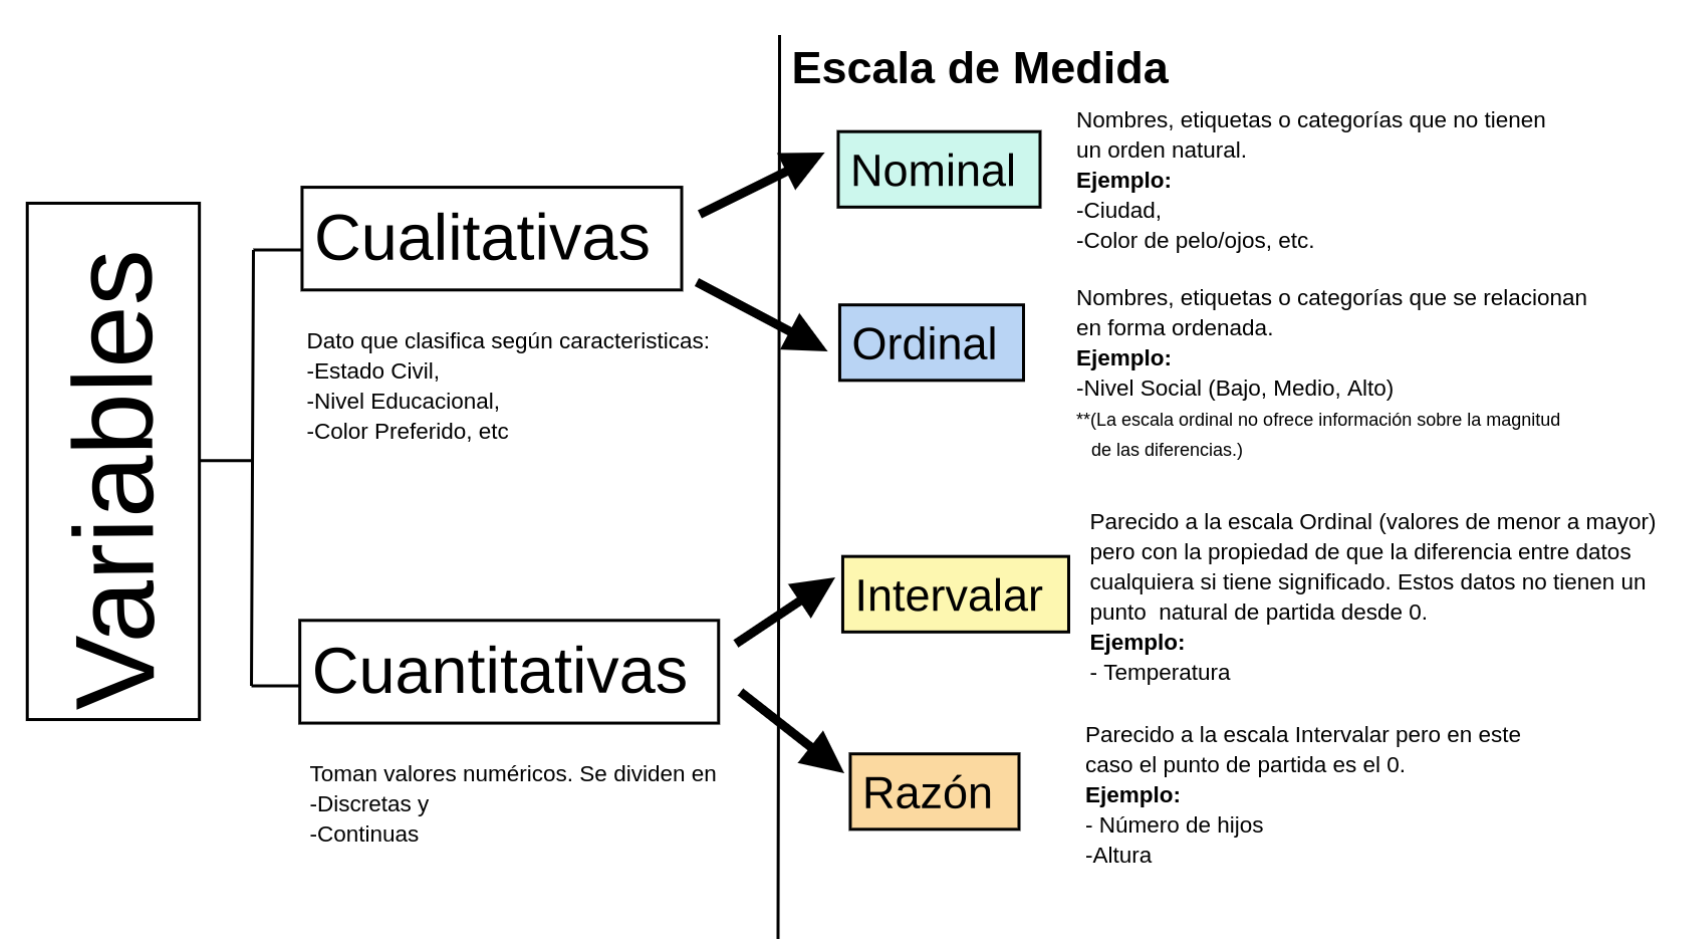

**Tipos de variables (o datos)**

Las variables o datos se pueden separar en dos tipos:

1. Cualitativas Son variables que clasifican según características o labels. p.e.: nacionalidad, estado civil, nivel educacional, etc.
2. Cuantitativas: Toman valores numéricos.
  * Discretas: permiten enumerar cantidades (contar).
  * Continuas: toman cualquier valor en los reales (medir).
3. Variables categóricas politómicas. Adquieren tres o más valores.
4. Variables categóricas dicotómicas. Son aquellas variables que adquieren un valor entre dos opciones de respuesta.

**Escalas de medición**

Tanto las variables cualitativas como cuantitativas tienen escalas de medición asociadas.

1. Cualitativas:

    **Escala Nominal**: variables cuyas respuestas son sólo nombres de categorías o etiquetas. p.e.: ciudad, color de pelo, color de ojos, etc.
    Escala Ordinal: variables cuyas respuestas son nombres, pero tienen algún tipo de orden (natural, lógico, temporal, etc.). p.e.: nivel socioeconómico: ABC1= Alto, C2= Medio, C3= Bajo, D= pobre. Este orden, no entrega (generalmente) información sobre la magnitud de las diferencias.

2. Cuantitativas:

  **Escala Intervalar**: variables cuyas respuestas se pueden ordenar de menor a mayor, y la diferencia tiene significado. Se pueden realizar comparaciones de igualdad/desigualdad (no tiene sentido realizar multplicacón y división), se puede medir la distancia existente entre cada valor de la escala. No hay un cero absoluto (es arbitrario). Las escalas de intervalos poseen la cualidad adicional de que los intervalos entre sus clases son iguales. Las diferencias son iguales entre cualquier par de números de la escala e indican diferencias iguales en el atributo sometido a medición. p.e.: la diferencia de temperatura entre una habitación a 20 grados centígrados y otra a 25 es la misma que la existente entre dos a 25 y 30 grados centígrados, respectivamente.

  Sin embargo, la razón entre los números de la escala no es necesariamente la misma que la existente entre las cantidades del atributo. p.e.: una habitación a 20 grados no está el doble caliente que otra a 10. Ello se debe a que el cero de la escala no expresa el valor nulo o ausencia de atributo. p.e.: escala de Likert, temperatura, fecha de nacimiento, tensión arterial, deterioro en una escala de deterioro cognitivo, etc.

  **Escala Razón**: Existe un 0 absoluto y es un punto de partida natural (representa la ausencia total de medida). Se puede realizar cualquier operación Aritmética (Suma, Resta, Multiplicación y División) y Lógica (Comparación y ordenamiento). p.e.: sueldo, número de hijos, altura, tiempo, volumen, etc.

  **Nota**: Las variables de escala son para SPSS todas aquellas variables cuyos valores representan magnitudes.

In [1]:
#importación de librerías
import pandas as pd 
import numpy as np

In [2]:
#carga de datos
BDECL = pd.read_csv("datos/Encuesta_Clima_Laboral.csv", sep=';')
BDECL = pd.DataFrame(BDECL)
BDECL

,ID,¿Le gusta el ambiente laboral en su lugar de trabajo?,¿Qué tan satisfecho se encuentra en su lugar de trabajo?,¿Cómo es su relación de trabajo con sus compañeros?,¿Es casado?,Edad,Ingresos mensuales,Número de hijos,Antigüedad en el trabajo,Género,Comuna de residencia,Nivel eduacional
0,1,Si,Satisfactorio,Buena,No,39,790196.0,0.0,7,Masculino,Maipú,Técnico
1,2,Si,Muy satisfactorio,Muy buena,No,39,638759.0,0.0,2,Masculino,Maipú,NaN
2,7,No,Indiferente,Mala,No,39,856065.0,3.0,14,Masculino,Maipú,Superior
3,4,Si,Satisfactorio,Buena,No,37,838440.0,0.0,10,NaN,Santiago,Técnico
4,5,Si,Satisfactorio,Muy buena,No,39,NaN,0.0,8,Masculino,Maipú,Técnico
5,6,Si,Muy satisfactorio,Buena,No,41,1106382.0,NaN,5,Femenino,Santiago,Superior
6,7,No,Indiferente,Mala,No,39,856065.0,3.0,14,Masculino,Maipú,Superior
7,8,Si,Satisfactorio,Buena,Si,41,932357.0,4.0,9,Masculino,NaN,NaN
8,9,Si,En desagrado,Ni buena ni mala,No,39,674550.0,1.0,8,Femenino,Maipú,Media
9,11,No,Indiferente,Ni buena ni mala,Si,45,1009575.0,NaN,3,Masculino,Las Condes,Superior


**Actividad 1**

Analice los tipos de variables que contiene la BBDD. Clasifiquela como Cualitativa o Cuantitativa.

In [3]:
BDECL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID                                                        21 non-null     int64  
 1   ¿Le gusta el ambiente laboral en su lugar de trabajo?     21 non-null     object 
 2   ¿Qué tan satisfecho se encuentra en su lugar de trabajo?  21 non-null     object 
 3   ¿Cómo es su relación de trabajo con sus compañeros?       21 non-null     object 
 4   ¿Es casado?                                               21 non-null     object 
 5   Edad                                                      21 non-null     int64  
 6   Ingresos mensuales                                        18 non-null     float64
 7   Número de hijos                                           18 non-null     float64
 8   Antigüedad en el traba

**Actividad 2**

Método: 'groupby'
Uso: DataFrame.groupby

Ejemplo:

DataFrame.groupby(by=None, axis=0, level=None, dropna=True)

by: asignación, función, etiqueta o lista de etiquetas. Se utiliza para determinar los grupos por lo cuales groupby realizará la agrupación. Si by una función, se llama en cada valor del índice del objeto.

axis: 0 para fila, 1 para columna (predeterminado 0)

level: nombre del nivel o secuencia de ellos, por defecto Ninguno Si el eje es un Multiíndice (jerárquico), agrupar por un nivel o niveles en particular.

In [4]:
#Consideremos el siguiente ejemplo

arrays = [['Universitario', 'Universitario', 'Tecnico', 'Tecnico'],
          ['Femenino', 'Masculino', 'Femenino', 'Masculino']]
index = pd.MultiIndex.from_arrays(arrays, names=('Estudio', 'Genero'))
df = pd.DataFrame({'Sueldo': [1390, 1350, 456, 320]},
                  index=index)
df

Sueldo
Estudio       Genero           
Universitario Femenino     1390
              Masculino    1350
Tecnico       Femenino      456
              Masculino     320

In [5]:
# Agrupemos por Estudio sacando el promedio de sueldo

df.groupby(level=0).mean()

,Sueldo
Estudio,
Tecnico,388.0
Universitario,1370.0


In [6]:
df.groupby(level=1).mean()

,Sueldo
Genero,
Femenino,923.0
Masculino,835.0


**Considere la base BDECL y agrupe por:**

¿Le gusta el ambiente laboral en su lugar de trabajo?','¿Es casado?', cuente

In [7]:
BDECL.groupby(['¿Le gusta el ambiente laboral en su lugar de trabajo?','¿Es casado?']).count()

ID  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?       
No                                                 No            4   
                                                   Si            2   
Si                                                 No           12   
                                                   Si            3   

                                                                ¿Qué tan satisfecho se encuentra en su lugar de trabajo?  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?                                                             
No                                                 No                                                           4          
                                                   Si                                                           2          
Si                                                 No                                                          12          
                                                   Si                                                           3          

                                                                ¿Cómo es su relación de trabajo con sus compañeros?  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?                                                        
No                                                 No                                                           4     
                                                   Si                                                           2     
Si                                                 No                                                          12     
                                                   Si                                                           3     

                                                                Edad  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?         
No                                                 No              4   
                                                   Si              2   
Si                                                 No             12   
                                                   Si              3   

                                                                Ingresos mensuales  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?                       
No                                                 No                            4   
                                                   Si                            2   
Si                                                 No                            9   
                                                   Si                            3   

                                                                Número de hijos  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?                    
No                                                 No                         4   
                                                   Si                         0   
Si                                                 No                        11   
                                                   Si                         3   

                                                                Antigüedad en el trabajo  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?                             
No                                                 No                                  4   
                                                   Si                                  2   
Si                                                 No                                 12   
                                                   Si                                  3   

                                                                Género  \
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?           
No                               

In [8]:
BDECL.groupby(['¿Le gusta el ambiente laboral en su lugar de trabajo?']).count()

,ID,¿Qué tan satisfecho se encuentra en su lugar de trabajo?,¿Cómo es su relación de trabajo con sus compañeros?,¿Es casado?,Edad,Ingresos mensuales,Número de hijos,Antigüedad en el trabajo,Género,Comuna de residencia,Nivel eduacional
¿Le gusta el ambiente laboral en su lugar de trabajo?,,,,,,,,,,,
No,6,6,6,6,6,6,4,6,6,6,6
Si,15,15,15,15,15,12,14,15,12,13,11


In [9]:
BDECL.groupby(['¿Es casado?']).count()

,ID,¿Le gusta el ambiente laboral en su lugar de trabajo?,¿Qué tan satisfecho se encuentra en su lugar de trabajo?,¿Cómo es su relación de trabajo con sus compañeros?,Edad,Ingresos mensuales,Número de hijos,Antigüedad en el trabajo,Género,Comuna de residencia,Nivel eduacional
¿Es casado?,,,,,,,,,,,
No,16,16,16,16,16,13,15,16,14,15,13
Si,5,5,5,5,5,5,3,5,4,4,4


**Actividad 3**

Como podemos observar tenemos muchos datos repetidos.

En lugar de pedir count pediremos frecuencias absolutas

In [10]:
BDECL.groupby(['¿Le gusta el ambiente laboral en su lugar de trabajo?','¿Es casado?']).agg(Frecuencia = ("¿Le gusta el ambiente laboral en su lugar de trabajo?", "count"))

Frecuencia
¿Le gusta el ambiente laboral en su lugar de tr... ¿Es casado?            
No                                                 No                    4
                                                   Si                    2
Si                                                 No                   12
                                                   Si                    3

In [11]:
# podemos ver cambiando de lugar las variables

BDECL.groupby(['¿Es casado?','¿Le gusta el ambiente laboral en su lugar de trabajo?']).agg(Frecuencia = ("¿Le gusta el ambiente laboral en su lugar de trabajo?", "count"))

Frecuencia
¿Es casado? ¿Le gusta el ambiente laboral en su lugar de tr...            
No          No                                                           4
            Si                                                          12
Si          No                                                           2
            Si                                                           3

In [12]:
# podemos ver cambiando de lugar las variables y sumar strings!!

BDECL.groupby(['¿Es casado?','¿Le gusta el ambiente laboral en su lugar de trabajo?']).agg(SUMA = ("¿Le gusta el ambiente laboral en su lugar de trabajo?", "sum"))

SUMA
¿Es casado? ¿Le gusta el ambiente laboral en su lugar de tr...                          
No          No                                                                  NoNoNoNo
            Si                                                  SiSiSiSiSiSiSiSiSiSiSiSi
Si          No                                                                      NoNo
            Si                                                                    SiSiSi

**Actividad 4**

Realicemos una tabla de frecuencias utilizando groupby que tenga frecuencias absolutas, fecuencias absolutas acumuladas, frecuencias relativas, frecuencias relativas acumuladas, para la variable ¿Le gusta el ambiente laboral en su lugar de trabajo?"

In [13]:
TF_P01 = (BDECL.groupby("¿Le gusta el ambiente laboral en su lugar de trabajo?").agg(Frecuencia = ("¿Le gusta el ambiente laboral en su lugar de trabajo?", "count")))
TF_P01["Frecuencia Acumulada"]  = TF_P01["Frecuencia"].cumsum() # el método cumsum() cálcula la suma acumulada
TF_P01["Frecuencia Relativa"]   = TF_P01['Frecuencia']/len(BDECL)
TF_P01["Relativa Acumulada"]    = TF_P01["Frecuencia Relativa"].cumsum()
TF_P01["Frecuencia Porcentual"] = TF_P01["Frecuencia Relativa"]*100
TF_P01["Porcentaje Acumulado"]  = TF_P01["Frecuencia Porcentual"].cumsum()
TF_P01

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
¿Le gusta el ambiente laboral en su lugar de trabajo?,,,,,,
No,6,6,0.285714,0.285714,28.571429,28.571429
Si,15,21,0.714286,1.000000,71.428571,100.000000


Como vemos tenemos muchos decimales. Podemos cambiar el número de decimales que se mostrará en la tabla de frecuencias mediante

pd.set_option("display.precision", n° de decimales)

In [14]:
pd.set_option("display.precision", 2) # Cambiar la cantidad de decimales, en este caso 2
TF_P01 = (BDECL
        .groupby("¿Le gusta el ambiente laboral en su lugar de trabajo?")
        .agg(Frecuencia = ("¿Le gusta el ambiente laboral en su lugar de trabajo?", "count")))
TF_P01["Frecuencia Acumulada"]  = TF_P01["Frecuencia"].cumsum()
TF_P01["Frecuencia Relativa"]   = TF_P01['Frecuencia']/len(BDECL)
TF_P01["Relativa Acumulada"]    = TF_P01["Frecuencia Relativa"].cumsum()
TF_P01["Frecuencia Porcentual"] = TF_P01["Frecuencia Relativa"]*100
TF_P01["Porcentaje Acumulado"]  = TF_P01["Frecuencia Porcentual"].cumsum()
TF_P01

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
¿Le gusta el ambiente laboral en su lugar de trabajo?,,,,,,
No,6,6,0.29,0.29,28.57,28.57
Si,15,21,0.71,1.00,71.43,100.00


**Actividad 5**

Utilizando los comandos anteriores, construya las tablas de frecuencias como la anterior para ¿Qué tan satisfecho se encuentra en su lugar de trabajo?

In [15]:
TF_P02 = (BDECL
        .groupby("¿Qué tan satisfecho se encuentra en su lugar de trabajo?")
        .agg(Frecuencia = ("¿Qué tan satisfecho se encuentra en su lugar de trabajo?", "count"))
        )
TF_P02["Frecuencia Acumulada"]  = TF_P02["Frecuencia"].cumsum()
TF_P02["Frecuencia Relativa"]   = TF_P02['Frecuencia']/len(BDECL)
TF_P02["Relativa Acumulada"]    = TF_P02["Frecuencia Relativa"].cumsum()
TF_P02["Frecuencia Porcentual"] = TF_P02["Frecuencia Relativa"]*100
TF_P02["Porcentaje Acumulado"]  = TF_P02["Frecuencia Porcentual"].cumsum()
TF_P02

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
¿Qué tan satisfecho se encuentra en su lugar de trabajo?,,,,,,
En desagrado,1,1,0.05,0.05,4.76,4.76
Indiferente,9,10,0.43,0.48,42.86,47.62
Muy satisfactorio,2,12,0.10,0.57,9.52,57.14
Satisfactorio,9,21,0.43,1.00,42.86,100.00


**Actividad 6**

Utilizando los comandos anteriores, construya las tablas de frecuencias como la anterior para ¿Cómo es su relación de trabajo con sus compañeros

In [16]:
TF_P03 = (BDECL
        .groupby("¿Cómo es su relación de trabajo con sus compañeros?")
        .agg(Frecuencia = ("¿Cómo es su relación de trabajo con sus compañeros?", "count"))
        )
TF_P03["Frecuencia Acumulada"]  = TF_P03["Frecuencia"].cumsum()
TF_P03["Frecuencia Relativa"]   = TF_P03['Frecuencia']/len(BDECL)
TF_P03["Relativa Acumulada"]    = TF_P03["Frecuencia Relativa"].cumsum()
TF_P03["Frecuencia Porcentual"] = TF_P03["Frecuencia Relativa"]*100
TF_P03["Porcentaje Acumulado"]  = TF_P03["Frecuencia Porcentual"].cumsum()
TF_P03

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
¿Cómo es su relación de trabajo con sus compañeros?,,,,,,
Buena,10,10,0.48,0.48,47.62,47.62
Mala,3,13,0.14,0.62,14.29,61.90
Muy buena,2,15,0.10,0.71,9.52,71.43
Ni buena ni mala,6,21,0.29,1.00,28.57,100.00


**Actividad 7**

Utilizando los comandos anteriores, construya las tablas de frecuencias como la anterior para ¿Es casado?

In [17]:
TF_P04 = (BDECL
        .groupby("¿Es casado?")
        .agg(Frecuencia = ("¿Es casado?", "count"))
        )
TF_P04["Frecuencia Acumulada"]  = TF_P04["Frecuencia"].cumsum()
TF_P04["Frecuencia Relativa"]   = TF_P04['Frecuencia']/len(BDECL)
TF_P04["Relativa Acumulada"]    = TF_P04["Frecuencia Relativa"].cumsum()
TF_P04["Frecuencia Porcentual"] = TF_P04["Frecuencia Relativa"]*100
TF_P04["Porcentaje Acumulado"]  = TF_P04["Frecuencia Porcentual"].cumsum()
TF_P04

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
¿Es casado?,,,,,,
No,16,16,0.76,0.76,76.19,76.19
Si,5,21,0.24,1.00,23.81,100.00


**Actividad 8**

Utilizando los comandos anteriores, construya las tablas de frecuencias como la anterior para edad

In [18]:
TF_P05 = (BDECL
        .groupby("Edad")
        .agg(Frecuencia = ("Edad", "count"))
        )
TF_P05["Frecuencia Acumulada"]  = TF_P05["Frecuencia"].cumsum()
TF_P05["Frecuencia Relativa"]   = TF_P05['Frecuencia']/len(BDECL)
TF_P05["Relativa Acumulada"]    = TF_P05["Frecuencia Relativa"].cumsum()
TF_P05["Frecuencia Porcentual"] = TF_P05["Frecuencia Relativa"]*100
TF_P05["Porcentaje Acumulado"]  = TF_P05["Frecuencia Porcentual"].cumsum()
TF_P05

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
Edad,,,,,,
36,1,1,0.05,0.05,4.76,4.76
37,1,2,0.05,0.10,4.76,9.52
39,9,11,0.43,0.52,42.86,52.38
41,2,13,0.10,0.62,9.52,61.90
43,1,14,0.05,0.67,4.76,66.67
45,4,18,0.19,0.86,19.05,85.71
49,1,19,0.05,0.90,4.76,90.48
53,1,20,0.05,0.95,4.76,95.24
55,1,21,0.05,1.00,4.76,100.00


Podemos observar que no es una buena tabla de frecuancias ya que incorpora todos los valores de la variable

Deberiamos agrupar los datos en una tabla de intervalos para ver mejor las frecuencias si tuvieramos 1000 datos la tabla de frecuencia seria muy dificil de entender para esta variabñe

Agrupación de datos en intervalos para la variable edad¶
Necesitamos construir intervalos. $a=\frac{X_{max}-X_{min}}{k}$

In [19]:
Min_Max = [min(BDECL['Edad']),max(BDECL['Edad'])]
Min_Max

[36, 55]

In [20]:
largo = list(np.arange(36, 55+3.8, 3.8))
largo

[36.0,
 39.8,
 43.599999999999994,
 47.39999999999999,
 51.19999999999999,
 54.999999999999986]

Solicitamos 5 intervalos para la variable Edad con una amplitud de $a=\frac{55-36}{5}=3.8$.

La función pd.cut permite segmentar y ordenar valores de datos en intervalos.

In [21]:
pd.cut(BDECL['Edad'], 5) 

0     (35.981, 39.8]
1     (35.981, 39.8]
2     (35.981, 39.8]
3     (35.981, 39.8]
4     (35.981, 39.8]
5       (39.8, 43.6]
6     (35.981, 39.8]
7       (39.8, 43.6]
8     (35.981, 39.8]
9       (43.6, 47.4]
10      (43.6, 47.4]
11    (35.981, 39.8]
12      (43.6, 47.4]
13      (51.2, 55.0]
14    (35.981, 39.8]
15      (47.4, 51.2]
16      (51.2, 55.0]
17      (39.8, 43.6]
18      (43.6, 47.4]
19    (35.981, 39.8]
20    (35.981, 39.8]
Name: Edad, dtype: category
Categories (5, interval[float64, right]): [(35.981, 39.8] < (39.8, 43.6] < (43.6, 47.4] < (47.4, 51.2] < (51.2, 55.0]]

In [22]:
BDECL['InterEdad'] = pd.cut(BDECL['Edad'], 5)

#BDECL['InterEdad'] = pd.cut(BDECL['Edad'], bins=5) # bins especie de contenedores

#largo = list(np.arange(37, 53, 3.2))
#BDECL['InterEdad'] = pd.cut(BDECL['Edad'], bins=largo, include_lowest=True, right=True)

TF_P5 = (BDECL
        .groupby('InterEdad')
        .agg(Frecuencia = ('InterEdad', "count"))
        ) #utilizamos la frecuencia por edades en cada intervalo
#TF_P5["Frecuencia Acumulada"] = TF_P5["Frecuencia"].cumsum()
TF_P5["Frecuencia Relativa"] = TF_P5['Frecuencia']/len(BDECL)
#TF_P5["Relativa Acumulada"] = TF_P5["Frecuencia Relativa"].cumsum()
#TF_P5["Frecuencia Porcentual"] = TF_P5["Frecuencia Relativa"]*100
#TF_P5["Porcentaje Acumulado"] = TF_P5["Frecuencia Porcentual"].cumsum()
TF_P5

,Frecuencia,Frecuencia Relativa
InterEdad,,
"(35.981, 39.8]",11,0.52
"(39.8, 43.6]",3,0.14
"(43.6, 47.4]",4,0.19
"(47.4, 51.2]",1,0.05
"(51.2, 55.0]",2,0.10


In [23]:
BDECL['InterEdad'] = pd.cut(BDECL['Edad'], 5)

#BDECL['InterEdad'] = pd.cut(BDECL['Edad'], bins=5) # bins especie de contenedores

#largo = list(np.arange(37, 53, 3.2))
#BDECL['InterEdad'] = pd.cut(BDECL['Edad'], bins=largo, include_lowest=True, right=True)

TF_P5 = (BDECL
        .groupby('InterEdad')
        .agg(Frecuencia = ('InterEdad', "count"))
        )
TF_P5["Frecuencia Acumulada"] = TF_P5["Frecuencia"].cumsum()
TF_P5["Frecuencia Relativa"] = TF_P5['Frecuencia']/len(BDECL)
TF_P5["Relativa Acumulada"] = TF_P5["Frecuencia Relativa"].cumsum()
TF_P5["Frecuencia Porcentual"] = TF_P5["Frecuencia Relativa"]*100
TF_P5["Porcentaje Acumulado"] = TF_P5["Frecuencia Porcentual"].cumsum()
TF_P5

,Frecuencia,Frecuencia Acumulada,Frecuencia Relativa,Relativa Acumulada,Frecuencia Porcentual,Porcentaje Acumulado
InterEdad,,,,,,
"(35.981, 39.8]",11,11,0.52,0.52,52.38,52.38
"(39.8, 43.6]",3,14,0.14,0.67,14.29,66.67
"(43.6, 47.4]",4,18,0.19,0.86,19.05,85.71
"(47.4, 51.2]",1,19,0.05,0.90,4.76,90.48
"(51.2, 55.0]",2,21,0.10,1.00,9.52,100.00


**Actividad 9**

Sacaremos medidas descriptivas de las variables

Python calcula estadísitcas descriptivas sobre variables numéricas continuas

In [24]:
#coupamos el describe para analizar las metricas de las variables continuas
BDECL.describe()

,ID,Edad,Ingresos mensuales,Número de hijos,Antigüedad en el trabajo
count,21.00,21.00,1.80e+01,18.00,21.00
mean,11.24,42.19,8.66e+05,1.06,8.29
std,6.00,5.10,1.20e+05,1.35,4.56
min,1.00,36.00,6.39e+05,0.00,1.00
25%,7.00,39.00,7.98e+05,0.00,4.00
50%,11.00,39.00,8.56e+05,0.50,9.00
75%,16.00,45.00,9.30e+05,1.75,11.00
max,21.00,55.00,1.11e+06,4.00,15.00


En Pandas podemos solicitar en forma individual otras medidas estadísticas:

* Media
* Mínimo
* Máximo
* Mediana
* Moda (que no sale direcatmente de Pandas sino de una libreria llamada scipy)

In [25]:
#cálculo lo realiza numpy
np.mean(BDECL['Edad'])

42.19047619047619

In [26]:
np.min(BDECL['Edad'])

36

In [27]:
np.max(BDECL['Edad'])

55

In [28]:
np.median(BDECL['Edad'])

39.0

In [29]:
#Para determinar el valor Modal de una variable, podemos importar la librería 

from scipy import stats as st

In [30]:
# Modas para cada columna
mode = st.mode(BDECL)
mode


ModeResult(mode=array([[7, 'Si', 'Satisfactorio', 'Buena', 'No', 39, 856065.0, 0.0, 14,
        'Masculino', 'Maipú', 'Superior',
        Interval(35.981, 39.8, closed='right')]], dtype=object), count=array([[ 2, 15,  9, 10, 16,  9,  2,  9,  4, 14,  6, 10, 11]]))

In [31]:
print(mode[0]) # Presenta el valor modal


[[7 'Si' 'Satisfactorio' 'Buena' 'No' 39 856065.0 0.0 14 'Masculino'
  'Maipú' 'Superior' Interval(35.981, 39.8, closed='right')]]


In [32]:
print(mode[1]) # Presenta la frecuencia asociada al valor modal

[[ 2 15  9 10 16  9  2  9  4 14  6 10 11]]
